### import Data

In [1]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
econ_df = pd.read_csv('../datasets/econ/EconomiesOfScale.csv')

In [3]:
econ_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
econ_df.shape

(1000, 2)

### Explore data

In [5]:
econ_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


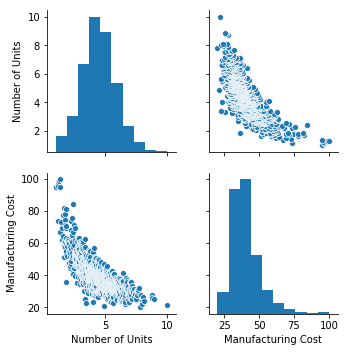

In [7]:
sns.pairplot(econ_df)

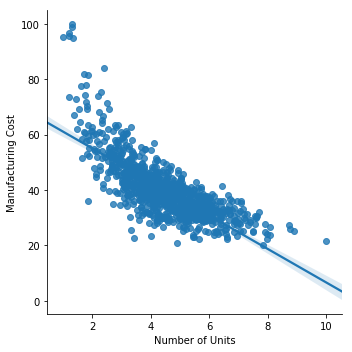

In [8]:
# See how straight line would fit. Example (linear regression). 
sns.lmplot(x = 'Number of Units', y = 'Manufacturing Cost', data = econ_df)

### Create & Prep Training Data

In [9]:
X = econ_df[['Number of Units']]
y = econ_df['Manufacturing Cost']

In [10]:

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [11]:
X.head()

,Number of Units
0,1.000000
1,1.185994
2,1.191499
3,1.204771
4,1.298773


In [12]:
y.head()

0    95.066056
1    96.531750
2    73.661311
3    95.566843
4    98.777013
Name: Manufacturing Cost, dtype: float64

In [13]:
X_train = X

In [26]:
y_train = y

In [27]:
from sklearn.preprocessing import PolynomialFeatures


In [28]:
poly_reg = PolynomialFeatures(degree = 2)


In [29]:
# Create Polynomial terms for X
X_columns = poly_reg.fit_transform(X_train)

In [30]:
X_columns.shape

(1000, 3)

In [31]:
#Linear regression
from sklearn.linear_model import LinearRegression
# fit_intercept true = assume b value
reg = LinearRegression(fit_intercept=True)

In [32]:
reg.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print('Linear Model Coefficient (m)', reg.coef_)


Linear Model Coefficient (m) [  0.         -16.82425278   1.17336718]


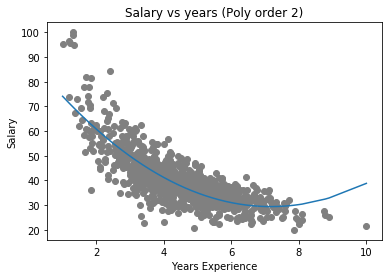

In [34]:
# plot testing data points
plt.scatter(X_train, y_train, color='gray')
# Plot model
plt.plot(X_train, reg.predict(X_columns))
# Add labels
plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.title('Salary vs years (Poly order 2)')